In [121]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor

# Load the Tips dataset from Seaborn

tips = sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [122]:
tips.info()
#We don't have any NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


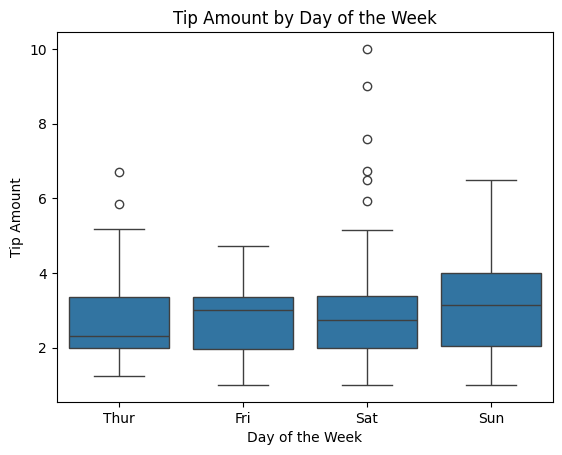

In [123]:
# Box plot of tips by day of the week
#I don't consider higher values as outliers because deleting them can be problematic in real life. When people give high tips, the model may not predict accurately.
#Additionally, the values are not significantly higher than the mean, its just that our dataset is small"

sns.boxplot(x='day', y='tip', data=tips)
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')
plt.title('Tip Amount by Day of the Week')
plt.show()


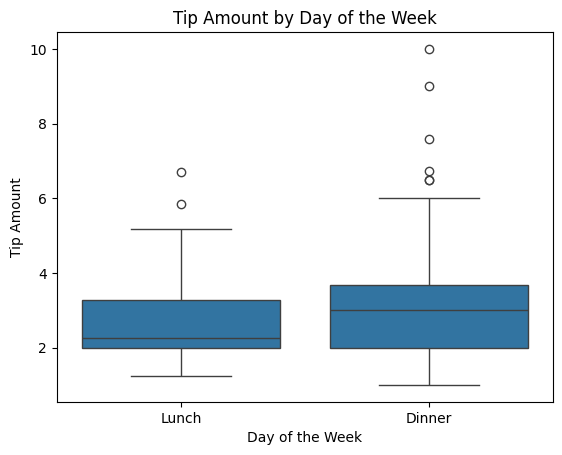

In [124]:
# Box plot of tips by day of the week
sns.boxplot(x='time', y='tip', data=tips)
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')
plt.title('Tip Amount by Day of the Week')
plt.show()

In [125]:
#number of unique values each feature and target
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

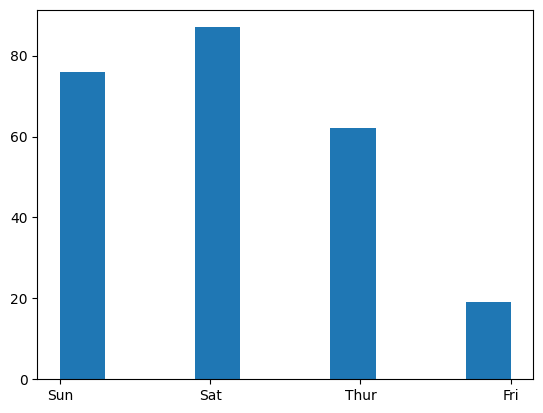

In [126]:
plt.hist(tips['day'])
plt.show()

In [127]:
#I don't think that being a smoker is related ttips = tips.drop(columns=['smoker'])
tips = tips.drop(columns=['smoker'])


In [128]:
tips[['total_bill', 'tip', 'size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [129]:
X = tips.drop(['tip'], axis=1) # Features
X = pd.get_dummies(X)
y = tips['tip']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.6683635863616759
Mean Absolute Error: 0.6604610353141438
R2 Score: 0.46529687349288207


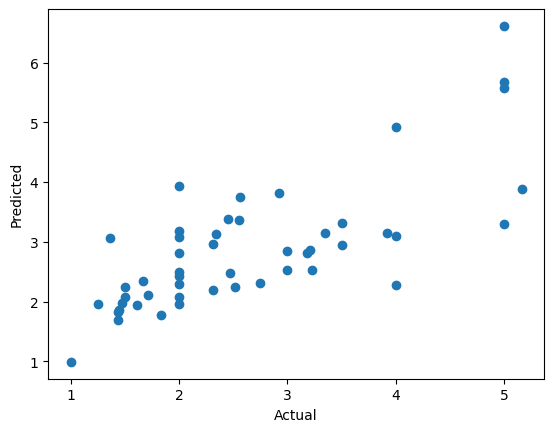

In [131]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Mean Squared Error: 0.5665976098709371
Mean Absolute Error: 0.6256100264339348
R2 Score: 0.5467115210170849


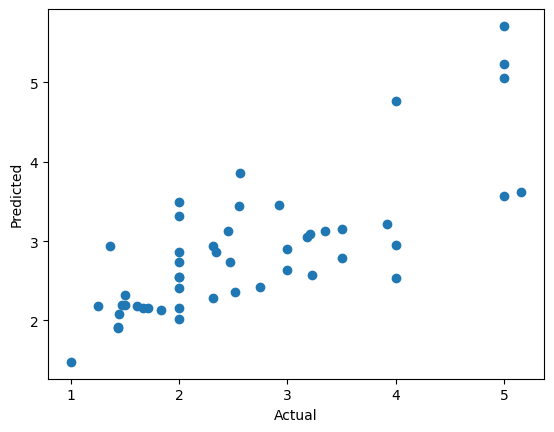

In [134]:
model = Lasso()
model.fit(X_train, y_train)

# Make predictions on the test
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Mean Squared Error: 0.5638165622197248
Mean Absolute Error: 0.6231816222972271
R2 Score: 0.5489364101409275


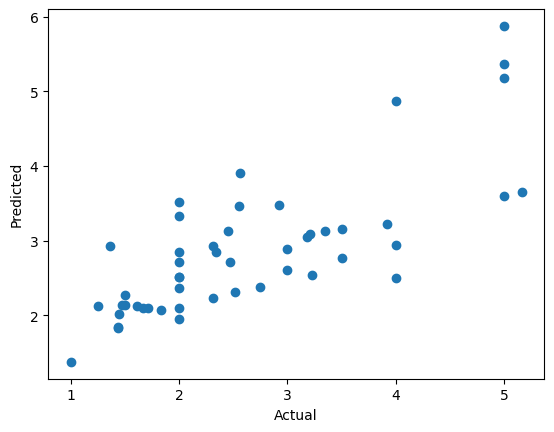

In [135]:
model = ElasticNet()
model.fit(X_train, y_train)

# Make predictions on the test
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Mean Squared Error: 0.9088861345736844
R2 Score: 0.27287442387303507


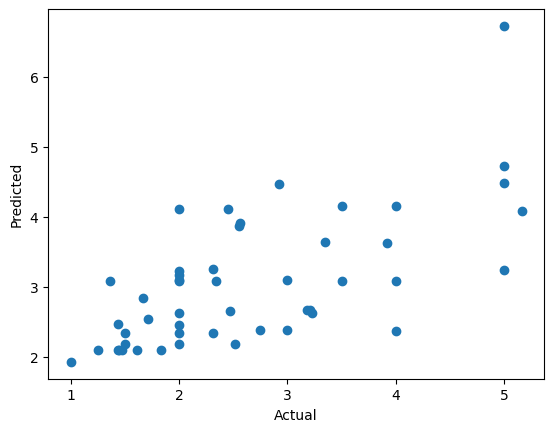

In [136]:
adaboost_reg = AdaBoostRegressor(n_estimators=50, random_state=42)

adaboost_reg.fit(X_train, y_train)

# Make predictions on the test
y_pred = adaboost_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()